# estimator API
- 일관성 : 모든 객체는 일관된 문서를 갖춘 제한된 메서드 집합에서 비롯된 공통 인터페이스 공유
- 검사(inspection) : 모든 지정된 파라미터 값은 공개 속성으로 노출

### API 사용 방법
1. scikit-learn으로부터 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택(모델링할 때 사용자가 직접 세팅해주는 값)
3. 데이터를 특징 배열과 대상 벡터로 배치
4. 모델 인스턴스의 fit()메서드를 호출해 선정된 모델에 훈련데이터 학습 시킨다
5. 훈련시킨 모델을 사용하여 새로운 데이터에 적용, 예측한다
    - 지도 학습 : 대체로 predict()를 사용해 알려지지않은 데이터에 대한 레이블 예측
    - 비지도 학습 : 대체로 transform()이나 predict()를 사용해 데이터의 속성을 변환하거나 추론

### API 사용예제

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

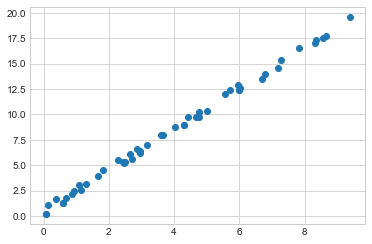

In [2]:
x = 10 * np.random.rand(50)
y = 2 * x + np.random.rand(50)
plt.scatter(x,y)

In [27]:
# 1. 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
from sklearn.linear_model import LinearRegression
## LinearRegression클래스는 학습데이터를 예측하기 위해서 각각의 특성별로 최적화된 가중치 값을 계산하는 알고리즘

In [4]:
# 2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택(클래스 객체 생성하기)
model = LinearRegression(fit_intercept=True) # fit_intercept:모형에 상수항이 있는가 없는가 결정
model

LinearRegression()

In [5]:
x

array([2.96238459, 1.14785042, 0.5814707 , 4.29141186, 8.65159947,
       0.08245747, 2.64631076, 7.1684339 , 0.06095916, 2.28763575,
       8.33537603, 3.59207466, 9.38698096, 1.30132313, 1.66536784,
       4.65862053, 4.01887194, 2.46740819, 7.27420892, 4.43286469,
       2.42844335, 8.56137235, 0.87668258, 1.08138894, 4.76445269,
       0.12239717, 5.01221765, 6.01101383, 0.68369766, 0.94264446,
       5.55418963, 6.77605047, 5.72149989, 2.9470066 , 2.84913995,
       4.30832474, 5.98248509, 0.59575285, 5.99632892, 5.96511362,
       7.82810996, 4.76360026, 6.68716421, 8.32177794, 2.50222051,
       3.66957   , 0.3670227 , 1.83338342, 2.72280342, 3.15538881])

In [6]:
# 3. 데이터를 특징 배열과 대상 벡터로 배치
X = x[:,np.newaxis]
X

array([[2.96238459],
       [1.14785042],
       [0.5814707 ],
       [4.29141186],
       [8.65159947],
       [0.08245747],
       [2.64631076],
       [7.1684339 ],
       [0.06095916],
       [2.28763575],
       [8.33537603],
       [3.59207466],
       [9.38698096],
       [1.30132313],
       [1.66536784],
       [4.65862053],
       [4.01887194],
       [2.46740819],
       [7.27420892],
       [4.43286469],
       [2.42844335],
       [8.56137235],
       [0.87668258],
       [1.08138894],
       [4.76445269],
       [0.12239717],
       [5.01221765],
       [6.01101383],
       [0.68369766],
       [0.94264446],
       [5.55418963],
       [6.77605047],
       [5.72149989],
       [2.9470066 ],
       [2.84913995],
       [4.30832474],
       [5.98248509],
       [0.59575285],
       [5.99632892],
       [5.96511362],
       [7.82810996],
       [4.76360026],
       [6.68716421],
       [8.32177794],
       [2.50222051],
       [3.66957   ],
       [0.3670227 ],
       [1.833

In [7]:
## np.newaxis (차원을 증가시킴) 예시
arr = np.arange(4)
print(arr.shape, arr)

(4,) [0 1 2 3]


In [8]:
row_vec = arr[np.newaxis, :]
print(row_vec.shape, row_vec)

(1, 4) [[0 1 2 3]]


In [9]:
# 4. 모델 인스턴스의 fit()메서드를 호출해 선정된 모델에 훈련데이터 학습 시킨다
model.fit(X, y)

LinearRegression()

In [10]:
# fit메서드는 모델에 필요한 두가지 변수를 전달해주는데 coef(계수;x,y앞에 붙는 수),intercept(절편)이다
model.coef_

array([2.01356032])

In [11]:
model.intercept_

0.4778664852079739

In [12]:
# 5. 훈련시킨 모델을 사용하여 새로운 데이터에 적용, 예측한다
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

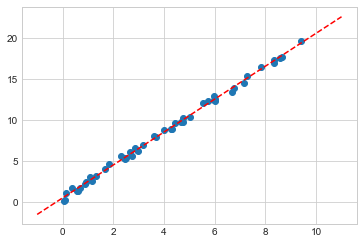

In [13]:
plt.scatter(x,y)
plt.plot(xfit,yfit,'--r');

### 분류, 회귀용 데이터 세트
- datasets.load_
- bostion : 미국 보스턴의 집의 특징과 가격 (회귀)
- breast_cancer : 유방암 (분류)
- diabetes : 당뇨 (회귀)
- digits : 0-9 이미지 (분류)
- iris : 붓꽃 (분류)

### 온라인 데이터 세트
- fetch_
- california_housing
- covtype
- 20newsgroups
- olivetti_faces
- lfw_people
- lfw_paris
- rcvl
- mldata

### 예제 데이터 세트 구조
- 일반적으로 딕셔너리 형태
- data : 특징 데이터 세트
- target : 분류용은 레이블 값, 회귀용은 숫자 결과값 데이터
- target_names : 개별 레이블의 이름 (분류용에서만)
- feature_names : 특징 이름을 리스트 형태로 가지고 있다
- DESCR : 데이터 세트에 대한 설명과 각 특징 설명

In [2]:
from sklearn.datasets import load_diabetes # 당뇨병 데이터셋 (회귀용)
diabetes = load_diabetes()
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [15]:
print(diabetes.data) # feature값 포함

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [16]:
print(diabetes.target) # 당뇨데이터셋은 회귀용이라 숫자형

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [17]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [18]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [19]:
print(diabetes.data_filename)
print(diabetes.target_filename)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\data\diabetes_data.csv.gz
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\data\diabetes_target.csv.gz


## model_selection모듈
- 학습용 데이터와 테스트 데이터로 분리
- 교차 검증 분할 및 평가

### train_test_split() : 학습/테스트 데이터 셋 분리

In [3]:
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.model_selection import train_test_split # train, test 데이터 분할
from sklearn.datasets import load_diabetes # 당뇨병 데이터셋 불러오기

In [21]:
diabetes = load_diabetes()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3)
# test데이터 30%, train데이터 70%로 분리 -> 지정안하면 할떄마다 랜덤

model = LinearRegression() 
# 데이터 학습하기
model.fit(X_train, y_train)
print('학습 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.5642767792717069
평가 데이터 점수: 0.36795785447453244


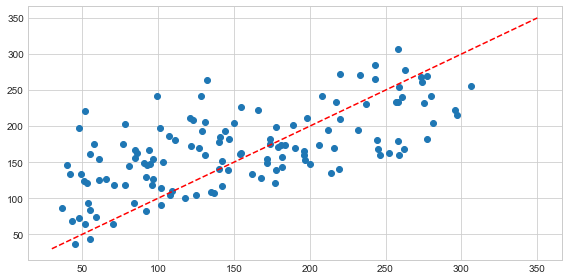

In [23]:
# 왜 0.5만 나오는지 예측해보기

predicted = model.predict(X_test)
expected = y_test

plt.figure(figsize=(8,4))
plt.scatter(expected, predicted)
plt.plot([30,350],[30,350],'--r')
plt.tight_layout() # 빨간석에 가까울수록 잘 맞춘건데 잘 맞추지않았음을 알 수 있다.

### cross_val_score() : 교차검증

In [4]:
from sklearn.model_selection import cross_val_score, cross_validate

In [25]:
scores = cross_val_score(model, diabetes.data, diabetes.target, cv=5) # cv : 몇개로 나눌지 결정
print('교차 검증 정확도: {}'.format(scores))
print('교차 검증 정확도: {} +/- {}'.format(np.mean(scores), np.std(scores)))

교차 검증 정확도: [0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
교차 검증 정확도: 0.4823181221114939 +/- 0.04926619776563216


### GridSearchCV : 교차 검증과 최적 하이퍼 파라미터 찾기
- cross_val_score를 여러번해서 최적의 하이퍼 파라미터를 찾는 것
- 훈련단계에서 학습한 파라미터에 영향을 받아서 최상의 파라미터를 찾는 일은 항상 어려운 문제
- 다양한 모델의 훈련 과정을 자동화하고, 교차 검사를 사용해 최적 값을 제공하는 도구 필요

#### GridSearchCV 클래스의 생성자 정리
- estimator : classifier, regressor, pipeline 등 가능
- alpha : 훈련세트의 성능대비모델을 얼마나 단순화할지 지정.높이면 훈련세트 성능은 나빠지지만 일반화에는 도움줌.
- param_grid : 찾고자하는 parameter 지정하기. dict로 할땐 parameter명은 string값으로, 적용할 값들은 list형태로 정의.
        - param_grid = {
                'n_estimators': [100, 150, 200, 250],
                'max_depth': [None, 6, 9, 12],
                'min_samples_split': [0.01, 0.05, 0.1],
                'max_features': ['auto', 'sqrt'] }
- scoring : 예측 성능을 측정할 평가 방법을 넣는다. 보통 accuracy 로 지정하여서 정확도로 성능 평가를 한다.
- cv : 교차 검증에서 몇개로 분할되는지 지정한다.
- refit : True가 디폴트로 True로 하면 최적의 하이퍼 파라미터를 찾아서 재학습 시킨다.

In [5]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge # 릿지회귀 : 회귀를 위한 선형모델.

#### Ridge 회귀
- 가중치선택은 훈련데이터를 잘 예측하는것뿐아니라 추가 제약조건을 만족하기 위함도 있다. 
- 가중치의 모든 원소가 0이 되는것이 목표, 기울기를 작게만들어서 특성의 영향력을 최소화->이런걸 '규제'라고함
- 규제는 과대적합이 되지 않도록 모델을 강제로 제한하는것. 릿지 회귀에서는 L2규제라고함.
- Ridge는 모델을 단순하게 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공

In [26]:
alpha =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
gs = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=10)
result = gs.fit(diabetes.data, diabetes.target)

print('최적 점수: {}'.format(result.best_score_)) # 최고 점수
print('최적 파라미터:{}'.format(result.best_params_)) # 최고 점수를 낸 파라미터
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적 점수: 0.4633240541517594
최적 파라미터:{'alpha': 0.1}
Ridge(alpha=0.1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002061,0.004211,0.000298,0.000456,0.001,{'alpha': 0.001},0.554415,0.233686,0.356799,0.620259,0.267033,0.619397,0.419907,0.433019,0.433431,0.684984,0.462293,0.145848,3
1,0.000599,0.000489,0.000399,0.000489,0.01,{'alpha': 0.01},0.546297,0.244132,0.368901,0.613732,0.271717,0.623089,0.426074,0.424759,0.429484,0.680912,0.462910,0.141446,2
2,0.000698,0.000457,0.000499,0.000499,0.1,{'alpha': 0.1},0.526550,0.244987,0.383530,0.606594,0.286094,0.618033,0.431230,0.441788,0.431968,0.662466,0.463324,0.132681,1
3,0.000698,0.000457,0.000298,0.000455,1,{'alpha': 1},0.421593,0.168442,0.358004,0.512608,0.284928,0.514264,0.388246,0.484448,0.396502,0.525132,0.405417,0.108385,4
4,0.000598,0.000489,0.000299,0.000457,10,{'alpha': 10},0.159386,-0.081177,0.152190,0.165690,0.119349,0.186933,0.158147,0.203748,0.153627,0.189440,0.140733,0.077298,5
5,0.000598,0.000489,0.000399,0.000489,100,{'alpha': 100},0.012468,-0.234480,0.013522,-0.012820,0.004838,0.022647,0.022028,-0.009908,0.015589,0.026427,-0.013969,0.074561,6
6,0.000698,0.000457,0.000299,0.000457,1000,{'alpha': 1000},-0.009602,-0.258118,-0.007849,-0.038479,-0.012933,-0.000932,0.001768,-0.042679,-0.004652,0.002744,-0.037073,0.075191,7


### multiprocessing 이용한 GridSearchCV

In [6]:
import multiprocessing
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression #데이터가 특정 카테고리에 속할지 0,1사이의 연속적인 확률로 예측

In [5]:
iris =  load_iris()

param_grid = [{ 'penalty': ['l1','l2'],
                 'C': [1.5, 2.0, 2.5, 3.0, 3.5] }]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
# n_jobs:매개변수를 사용하여 사용할 코어 수 지정. 사용하는 cpu코어수에 비례해서 속도도 빨라짐(-1:모든코어)

result = gs.fit(iris.data, iris.target)

print('최적 점수: {}'.format(result.best_score_)) # 최고 점수
print('최적 파라미터:{}'.format(result.best_params_)) # 최고 점수를 낸 파라미터
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적 점수: 0.9800000000000001
최적 파라미터:{'C': 2.5, 'penalty': 'l2'}
LogisticRegression(C=2.5)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000201,0.000402,0.000000,0.000000,1.5,l1,"{'C': 1.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.117683,0.056426,0.001398,0.001352,1.5,l2,"{'C': 1.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000299,0.000457,0.000000,0.000000,2,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.088320,0.021279,0.001209,0.000595,2,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000100,0.000299,0.000000,0.000000,2.5,l1,"{'C': 2.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.079154,0.023910,0.002094,0.003410,2.5,l2,"{'C': 2.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000299,0.000457,0.000000,0.000000,3,l1,"{'C': 3.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.082435,0.016829,0.001596,0.003492,3,l2,"{'C': 3.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000698,0.001184,0.000000,0.000000,3.5,l1,"{'C': 3.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,0.079687,0.023027,0.000897,0.000538,3.5,l2,"{'C': 3.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## preprocessing 데이터 전처리 모듈
- 데이터의 특징 스케일링(feature scaling)을 위한 방법으로 표준화(Standardization)와 정규화(Normalization)를 사용
- 표준화 방법 : x^i = xi -mean(x)/stdex(x)
- 정규화 방법 : x^i = xi - min(x)/max(x)-min(x)
- scikit leanrn에서는 개별 벡터 크기를 맞추는 형태로 정규화

- 스케일링을 할 때 fit_transform(), fit(), transform() 메서드 사용.
- fit()은 데이터를 학습시키는 메서드이고 transform()은 실제로 학습시킨 것을 적용하는 메서드.
- fit_transform()은 말그대로 fit()과 transform()을 한번에 처리할 수 있게 하는 메서드인데 조심해야 하는 것은 테스트 데이터에는 fit_transform()메서드를 쓰면 안된다.

### StandardScaler : 표준화 클래스
- 평균=0, 표준편차=1로 조정해서 모든 특성이 같은 크기를 갖게 한다

In [7]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df) # iris_df를 스케일링
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [11]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target, test_size=0.3)

model = LogisticRegression() # 데이터가 특정 카테고리에 속할지 0,1사이의 연속적인 확률로 예측
model.fit(X_train, y_train)

print('훈련 데이터 점수:{}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수:{}'.format(model.score(X_test, y_test)))

훈련 데이터 점수:0.9714285714285714
평가 데이터 점수:0.9333333333333333


### MinMaxScaler : 정규화 클래스
- 모든 feature의 최대/최소값이 0~1사이에 있도록 스케일링

In [18]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

In [19]:
Mscaler = MinMaxScaler()
irir_scaled = Mscaler.fit_transform(iris_df)
iris_df_Mscaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)
iris_df_Mscaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [20]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled,iris.target, test_size=0.3)

model = LogisticRegression()
model.fit(X_train,y_train)

print('훈련 데이터 점수:{}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수:{}'.format(model.score(X_test, y_test)))
# 결과를 확인해보니 StandardScaler한 데이터의 결과보다 minmaxscaler한 데이터의 결과가 더 높게 나왔다

훈련 데이터 점수:0.9809523809523809
평가 데이터 점수:0.9555555555555556


# 성능 평가 지표 

## 정확도(Accuracy)
- 정확도는 전체 예측 데이터 건수 중 예측 결과가 동일한 데이터 건수로 계산(정확히 예측한것)
- scikit-laearn에서 accuracu_score함수 제공

#### make_classification
- make_classification함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령이다.
- 인수
     - n_samples : 표본 데이터의 수, 디폴트 100
     - n_features : 독립 변수의 수, 디폴트 20
     - n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
     - n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
     - n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
     - n_classes : 종속 변수의 클래스 수, 디폴트 2
     - n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
     - weights : 각 클래스에 할당된 표본 수
     - random_state : 난수 발생 시드
- 반환값
    - X : [n_samples, n_features] 크기의 배열
        - 독립변수
    - y : [n_samples] 크기의 배열
        - 종속 변수

In [31]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                          n_redundant=0, n_clusters_per_class=1)# 클래스당 몇개의 클러스터를 생성할지 지정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train,y_train)

print('훈련 데이터 점수:{}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수:{}'.format(model.score(X_test,y_test)))

predict = model.predict(X_test) # 테스트데이터에 대해서 예측, 얼마나 잘 예측했는지 정확도로 측정
print('정확도:{}'.format(accuracy_score(y_test, predict))) # 분포도가 균일하지 않아도 정확도가 높게 나올 수 있으니 정확도만 보고 판단하면 안된다.

훈련 데이터 점수:0.9414285714285714
평가 데이터 점수:0.96
정확도:0.96


### 오차 행렬(Confusion Matrix)
- TN : 예측값을 Negative값 0으로 예측했는데, 실제 값도 Negative 값 0 (ex.암이 아니라고 판단했는데 실제로 암이 아니었음)
- FN : 예측값을 Negative값 0으로 예측했는데, 실제 값은 Positive 값 1 (ex.암이 아니라고 판단했는데 실제로는 암이었다)
- FP : 예측값을 Positive값 1로 예측했는데, 실제 값은 Negative값 0 (ex.암이라고 판단했는데 실제로는 암이 아니었음)
- TP :  예측값을 Positive값 1로 예측했는데, 실제 값도 Positive값 1 (ex.암이라고 판단했는데 실제로도 암이었다)

In [36]:
from sklearn.metrics import confusion_matrix

In [38]:
confmat = confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

[[162   2]
 [ 10 126]]


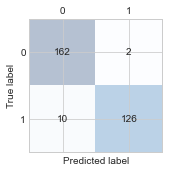

In [40]:
# 시각화
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3) # matshow :오차행렬 그림으로 나타내는 함수
for i in range(confmat.shape[0]): # shape가 (4,3)일떄 shape[0]은 행의 갯수 4, shape[1]은 열의 갯수 3을 의미
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

### 정밀도(Precision)와 재현율(Recall)

- 정밀도 = TP/(FP+TP)
- 재현율 = TP/(FN+TP)
- 정확도 = (TN+TP)/(TN+FP+FN+TP)
- 오류율 = (FN+FP)/(TN+FP+FN+TP)

In [47]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)

print('정밀도:{}'.format(precision)) # 126/(2+126)
print('재현율:{}'.format(recall)) # 126/(10+126)

정밀도:0.984375
재현율:0.9264705882352942


### F1 score(F-measure)
- 정밀도와 재현율의 결합한 지표
- 정밀도와 재현율이 어느 한쪽으로 치우치치 않을때 높은 값을 가짐
- F1 = 2*((precision+recall)/(precision+recall))

In [48]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test,predict)
print('F1 Score:{}'.format(f1))

F1 Score:0.9545454545454545


### ROC 곡선과 AUC
- ROC곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
    - TPR(True Positive Rate) : TP/(FN+TP),재현율
    - TNR(True Negative Rate) : TN/(FP+TN)
    - FPR(False Positive Rate) : FP/(FP+TN), 1-TNR
- AUC(Area Under Curve)값은 ROC 곡선 밑에 면적을 구한 값(1이 가까울수록 좋은 값)

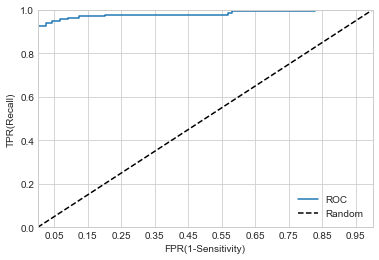

In [52]:
from sklearn.metrics import roc_curve

pred_proba_class1 = model.predict_proba(X_test)[:,1]
fprs, tprs, threholds = roc_curve(y_test, pred_proba_class1)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1], '--k', label='Random')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR(1-Sensitivity)')
plt.ylabel('TPR(Recall)')
plt.legend();
# roc곡선이 random선에 가까울수록 성능이 안좋다는걸 의미하고, 그래프는 두 선의 차이가 먼것을 알 수 있다

In [53]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, predict)
print('ROC AUC Score:{}'.format(roc_auc))

ROC AUC Score:0.9571377331420373
